In [37]:
#file_name="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/modisco_jun_30/modisco/ATAC/K562/footprints/K562_uncorrected_all_scores.csv"
#negs_file="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/negatives_data/negatives_with_summit.bed"
#dnase_file_name="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/modisco_jun_30/modisco/DNASE/K562/footprints/K562_uncorrected_all_scores.csv"

file_name="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/modisco_jun_30/modisco/ATAC/K562/footprints/K562_all_new_scores.csv"
negs_file="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/negatives_data/negatives_with_summit.bed"
dnase_file_name="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/modisco_jun_30/modisco/DNASE/K562/footprints/K562_all_new_scores.csv"

file_name="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/modisco_jun_30/modisco/ATAC/K562/footprints/K562_all_scores.csv"
negs_file="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/negatives_data/negatives_with_summit.bed"
dnase_file_name="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/modisco_jun_30/modisco/DNASE/K562/footprints/K562_all_scores.csv"


In [38]:
import pandas as pd

In [39]:
PWM_SCHEMA = ["MOTIF_NAME", "MOTIF_PWM_FWD", "BEST_TOMTOM_MATCH", "MODISCO_CWM_FWD", "MODISCO_CWM_REV", "4", "5", "6", "7", "8"]

motifs_to_pwm="/mnt/lab_data2/anusri/chrombpnet/src/evaluation/marginal_footprints/union_motifs.tsv"
pwm_df = pd.read_csv(motifs_to_pwm, sep='\t',names=PWM_SCHEMA)
pwm_df = pwm_df[["MOTIF_NAME", "BEST_TOMTOM_MATCH"]]
                 
                 
                 

In [40]:
pwm_df["BEST_TOMTOM_MATCH"] = pwm_df["BEST_TOMTOM_MATCH"].str.split("_").str[0]

In [41]:
data = pd.read_csv(file_name)
dnase_data = pd.read_csv(dnase_file_name)

In [42]:
data.head()

,MOTIF_NAME,footprint_score,footprint_width,distance_from_center_left,distance_from_center_right,motif_width
0,GM12878_COUNTS_metacluster_0_pattern_0,0.18,32,21,11,18
1,GM12878_COUNTS_metacluster_0_pattern_1,7.88,55,33,22,21
2,GM12878_COUNTS_metacluster_0_pattern_10,0.08,31,15,16,15
3,GM12878_COUNTS_metacluster_0_pattern_11,0.58,42,21,21,16
4,GM12878_COUNTS_metacluster_0_pattern_12,0.80,46,20,26,24


In [7]:
output_atac = pwm_df.merge(data, right_on="MOTIF_NAME", left_on="MOTIF_NAME")
print(output_atac.head())

                             MOTIF_NAME BEST_TOMTOM_MATCH  footprint_score  \
0  HEPG2_COUNTS_metacluster_0_pattern_0              CTCF             8.73   
1  HEPG2_COUNTS_metacluster_0_pattern_1             HNF4G             0.04   
2  HEPG2_COUNTS_metacluster_0_pattern_2             FOXM1             0.03   
3  HEPG2_COUNTS_metacluster_0_pattern_3               SP3             0.36   
4  HEPG2_COUNTS_metacluster_0_pattern_4             FOXO6             0.02   

   footprint_width  distance_from_center_left  distance_from_center_right  \
0               55                         23                          32   
1                8                          3                           5   
2               16                         10                           6   
3               47                         20                          27   
4               16                         10                           6   

   motif_width  
0           22  
1           20  
2           15  


In [8]:
output_dnase = pwm_df.merge(dnase_data, right_on="MOTIF_NAME", left_on="MOTIF_NAME")
print(output_dnase.head())

                             MOTIF_NAME BEST_TOMTOM_MATCH  footprint_score  \
0  HEPG2_COUNTS_metacluster_0_pattern_0              CTCF            11.19   
1  HEPG2_COUNTS_metacluster_0_pattern_1             HNF4G             0.01   
2  HEPG2_COUNTS_metacluster_0_pattern_2             FOXM1             0.01   
3  HEPG2_COUNTS_metacluster_0_pattern_3               SP3             0.24   
4  HEPG2_COUNTS_metacluster_0_pattern_4             FOXO6             0.01   

   footprint_width  distance_from_center_left  distance_from_center_right  \
0               36                         14                          22   
1               13                         10                           3   
2                9                          3                           6   
3               30                         13                          17   
4               31                          7                          24   

   motif_width  
0           22  
1           20  
2           15  


In [9]:
output_atac = output_atac.sort_values('footprint_score', ascending=False).drop_duplicates('BEST_TOMTOM_MATCH').sort_index().reset_index()

output_atac.head()
print(output_atac.shape)


(106, 8)


In [10]:
#output_dnase = output_dnase.sort_values('footprint_score', ascending=False).drop_duplicates('BEST_TOMTOM_MATCH').sort_index().reset_index()

output_dnase= output_dnase.iloc[output_atac["index"]]



In [11]:
output_dnase = output_dnase.reset_index()

In [12]:
import matplotlib.pyplot as plt

(58, 8)


Text(0, 0.5, 'motif width')

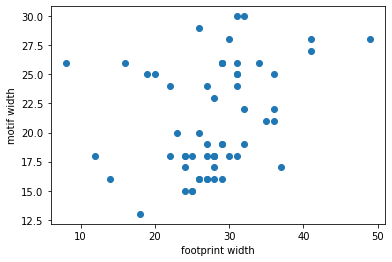

In [57]:
filt=output_atac[output_atac["footprint_score"]>0.1]
dnase_filt=output_dnase[output_atac["footprint_score"]>0.1]
print(filt.shape)

plt.scatter(dnase_filt["footprint_width"], dnase_filt["motif_width"])
plt.xlabel('footprint width')
plt.ylabel('motif width') 

In [56]:
print(dnase_filt.shape)

(58, 8)


(58, 8)


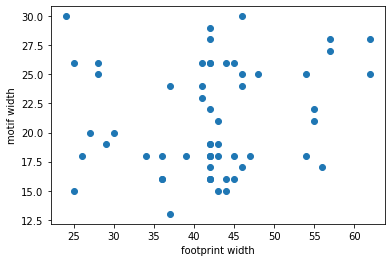

In [58]:
plt.scatter(filt["footprint_width"], filt["motif_width"])
plt.xlabel('footprint width')
plt.ylabel('motif width')  
print(filt.shape)

In [49]:
from scipy import stats
stats.pearsonr(dnase_filt["footprint_width"], dnase_filt["motif_width"])

(0.3264103757455188, 0.18617478329577555)

In [50]:
stats.pearsonr(filt["footprint_width"], filt["motif_width"])

(0.38785301298721225, 0.1117496415582053)

Text(0, 0.5, 'atac footprint scores')

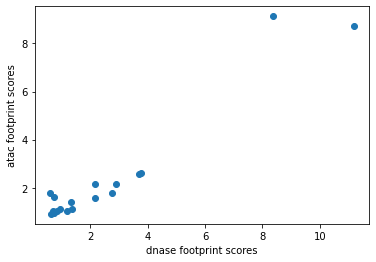

In [51]:
plt.scatter(dnase_filt["footprint_score"],filt["footprint_score"])
plt.xlabel('dnase footprint scores')
plt.ylabel('atac footprint scores') 

Text(0, 0.5, 'log of atac footprint scores')

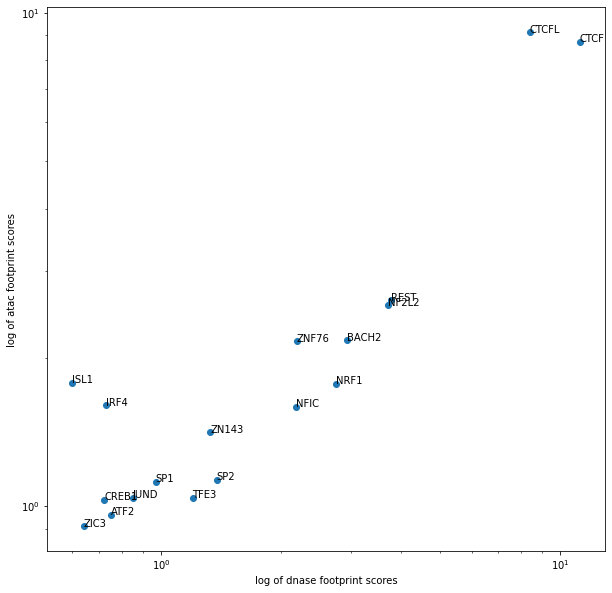

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(dnase_filt["footprint_score"],filt["footprint_score"])

for i, r in filt.iterrows():
    #print(filt.loc[i,"BEST_TOMTOM_MATCH"])
    #print(filt.loc[i,"BEST_TOMTOM_MATCH"],dnase_filt.loc[i,"footprint_score"],filt.loc[i,"footprint_score"])
    ax.annotate(filt.loc[i,"BEST_TOMTOM_MATCH"], (dnase_filt.loc[i,"footprint_score"], filt.loc[i,"footprint_score"]))

ax.set_yscale('log')
ax.set_xscale('log')

plt.xlabel('log of dnase footprint scores')
plt.ylabel('log of atac footprint scores') 
    

In [53]:
stats.pearsonr(dnase_filt["footprint_score"],filt["footprint_score"])

(0.9578650705020889, 4.375710270300615e-10)

Text(0, 0.5, 'motif width')

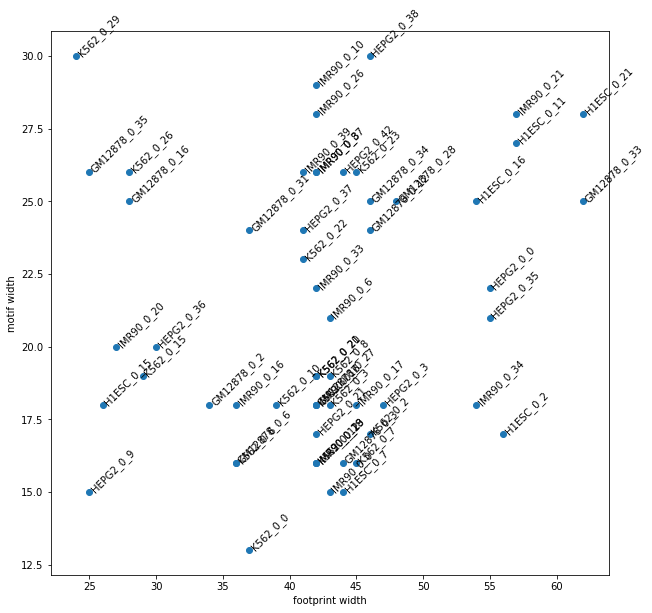

In [59]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(filt["footprint_width"],filt["motif_width"])

for i, r in filt.iterrows():
    #print(filt.loc[i,"BEST_TOMTOM_MATCH"])
    #print(filt.loc[i,"BEST_TOMTOM_MATCH"],dnase_filt.loc[i,"footprint_score"],filt.loc[i,"footprint_score"])
    ax.annotate(filt.loc[i,"MOTIF_NAME"].replace("COUNTS_metacluster_","").replace("pattern_",""), (filt.loc[i,"footprint_width"], filt.loc[i,"motif_width"]), rotation=45)

#ax.set_yscale('log')
#ax.set_xscale('log')

plt.xlabel('footprint width')
plt.ylabel('motif width') 
    

Text(0, 0.5, 'absolute difference in symmtery atac')

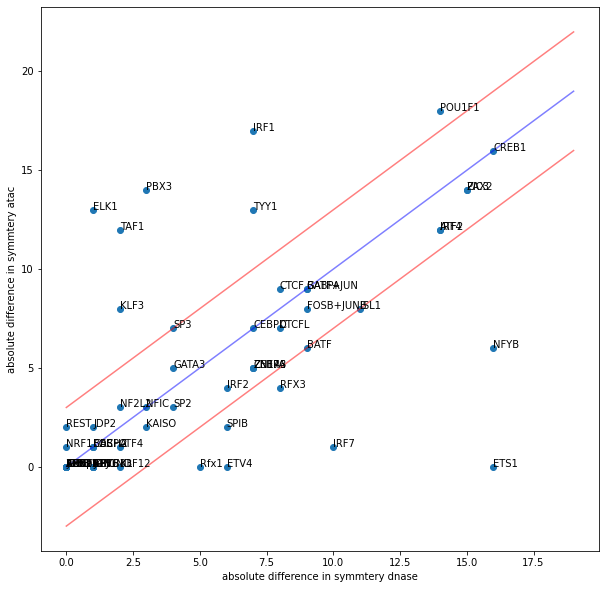

In [20]:
import numpy as np

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(np.abs(dnase_filt["distance_from_center_left"]-dnase_filt["distance_from_center_right"]),np.abs(filt["distance_from_center_left"]-filt["distance_from_center_right"]))

for i, r in filt.iterrows():
    #print(filt.loc[i,"BEST_TOMTOM_MATCH"])
    #print(filt.loc[i,"BEST_TOMTOM_MATCH"],dnase_filt.loc[i,"footprint_score"],filt.loc[i,"footprint_score"])
    ax.annotate(filt.loc[i,"BEST_TOMTOM_MATCH"], (np.abs(dnase_filt.loc[i,"distance_from_center_left"]-dnase_filt.loc[i,"distance_from_center_right"]), np.abs(filt.loc[i,"distance_from_center_left"]-filt.loc[i,"distance_from_center_right"])))

#ax.set_yscale('log')
#ax.set_xscale('log')

c = np.arange(0,20,1)

plt.plot(c,c,'b-', alpha=0.5)
plt.plot(c,c-3,'r-', alpha=0.5)
plt.plot(c,c+3,'r-', alpha=0.5)

plt.xlabel('absolute difference in symmtery dnase')
plt.ylabel('absolute difference in symmtery atac') 
    

In [21]:
dnase_dist = np.abs(dnase_filt.loc[:,"distance_from_center_left"]-dnase_filt.loc[:,"distance_from_center_right"])
atac_dist = np.abs(filt.loc[:,"distance_from_center_left"]-filt.loc[:,"distance_from_center_right"])


In [22]:
np.sum((np.abs(dnase_dist-atac_dist).values)>3)/dnase_dist.shape[0]

0.2413793103448276

In [23]:
dnase_dist.shape

(58,)

In [24]:
index=(np.abs(dnase_dist-atac_dist).values)>3

In [25]:
index.shape

(58,)